In [1]:
import os

In [3]:
# Unzipped train and test files

import zipfile

zip_files = ['test1', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("./dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall("./dogs-vs-cats")
        print("{} unzipped".format(zip_file))



test1 unzipped
train unzipped


In [2]:
TRAIN_DIR_PATH = './dogs-vs-cats/train/cat'
TEST_DIR_PATH = './dogs-vs-cats/test1'
train_file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in train directory.'.format(len(train_file_names)))
test_file_names = os.listdir(TEST_DIR_PATH)
print('There are {} number of images in test directory.'.format(len(test_file_names)))


FileNotFoundError: [Errno 2] No such file or directory: './dogs-vs-cats/train/cat'

In [4]:
from pathlib import Path

image_path = Path("dogs-vs-cats/")
train_dir = image_path / "train"
test_dir = image_path / "test"
validation_dir = image_path / "validation"

train_dir , test_dir, validation_dir

(PosixPath('dogs-vs-cats/train'),
 PosixPath('dogs-vs-cats/test'),
 PosixPath('dogs-vs-cats/validation'))

In [5]:
import os
import shutil

def split_images_into_classes(train_dir):
    # Create 'cat' and 'dog' directories inside the 'train' directory
    cat_dir = os.path.join(train_dir, 'cat')
    dog_dir = os.path.join(train_dir, 'dog')
    os.makedirs(cat_dir, exist_ok=True)
    os.makedirs(dog_dir, exist_ok=True)

    # Iterate through the files in the 'train' directory
    for filename in os.listdir(train_dir):
        file_path = os.path.join(train_dir, filename)
        
        # Skip if it's not a file (e.g., the newly created directories)
        if os.path.isfile(file_path):
            if filename.startswith('cat'):
                shutil.move(file_path, os.path.join(cat_dir, filename))
            elif filename.startswith('dog'):
                shutil.move(file_path, os.path.join(dog_dir, filename))

    print("Images have been successfully split into 'cat' and 'dog' directories.")

# Example usage
split_images_into_classes(train_dir)


Images have been successfully split into 'cat' and 'dog' directories.


In [6]:
cat_dir_train = './dogs-vs-cats/train/cat'
dog_dir_train = './dogs-vs-cats/train/dog'
cat_file_names = os.listdir(cat_dir_train)
print('There are {} number of images in cat directory.'.format(len(cat_file_names)))
dog_file_names = os.listdir(dog_dir_train)
print('There are {} number of images in dog directory.'.format(len(dog_file_names)))


There are 12500 number of images in cat directory.
There are 12500 number of images in dog directory.


Random image path: dogs-vs-cats/train/dog/dog.1649.jpg
Image height: 500
Image width: 497


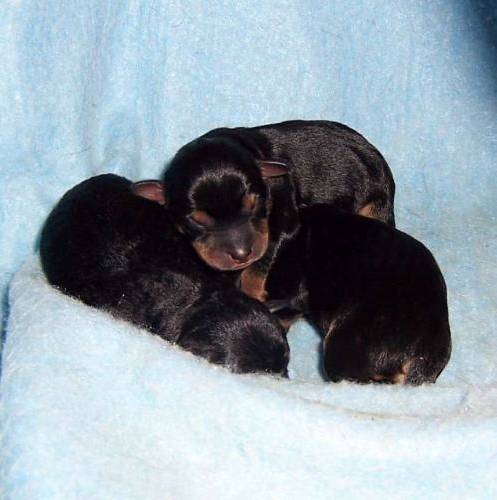

In [7]:
import random
from PIL import Image

# Set seed
seed = 42


# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random.seed(seed)
random_image_path = random.choice(image_path_list)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [6]:
# Get a set of pretrained model weights
weights = models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet


In [9]:
import os
import shutil
from pathlib import Path
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader, Subset

# Set a seed for reproducibility
seed = 42
torch.manual_seed(seed)

# Define your directory paths
base_dir = "dogs-vs-cats"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
validation_dir = os.path.join(base_dir, "validation")

# Create class directories for the test data
for class_name in ['cat', 'dog']:
    class_test_dir = os.path.join(test_dir, class_name)
    if not os.path.exists(class_test_dir):
        os.makedirs(class_test_dir)

    class_valid_dir = os.path.join(validation_dir, class_name)
    if not os.path.exists(class_valid_dir):
        os.makedirs(class_valid_dir)


# Organize test images by moving them to the test directory
for class_name in ['cat', 'dog']:
    class_train_dir = os.path.join(train_dir, class_name)
    for filename in os.listdir(class_train_dir):
        if torch.rand(1).item() < 0.15:  # 15% probability
            source = os.path.join(class_train_dir, filename)
            destination = os.path.join(test_dir, class_name, filename)
            shutil.move(source, destination)

    class_train_dir = os.path.join(train_dir, class_name)
    for filename in os.listdir(class_train_dir):

        if torch.rand(1).item() < 0.15:  # 15% probability
            source = os.path.join(class_train_dir, filename)
            destination = os.path.join(validation_dir, class_name, filename)
            shutil.move(source, destination)

print("Test images have been moved to the test directory.")
print("Validation images have been moved to the validation directory.")


Test images have been moved to the test directory.
Validation images have been moved to the validation directory.


In [10]:
cat_dir_test = './dogs-vs-cats/validation/cat'
dog_dir_test = './dogs-vs-cats/validation/dog'
cat_file_test = os.listdir(cat_dir_test)
print('There are {} number of images in cat directory.'.format(len(cat_file_test)))
dog_file_test = os.listdir(dog_dir_test)
print('There are {} number of images in dog directory.'.format(len(dog_file_test)))


There are 1576 number of images in cat directory.
There are 1552 number of images in dog directory.


In [10]:
torch.manual_seed(seed)

torch.cuda.manual_seed(seed)

# Example data transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

validation_transforms= transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [11]:
import matplotlib.pyplot as plt
base_dir = "dogs-vs-cats"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

In [11]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

'''plot_transformed_images(image_path_list, 
                        transform=train_transforms, 
                        n=3,
                        seed=seed)'''

'plot_transformed_images(image_path_list, \n                        transform=train_transforms, \n                        n=3,\n                        seed=seed)'

# Trying to Load Data


In [12]:
import torch
from torchvision.datasets import FakeData
from torchvision.transforms import v2


NUM_CLASSES = 100

In [13]:
import os
import shutil

# Define your directory paths
base_dir = "dogs-vs-cats"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Create class directories if they don't exist
for class_name in ['cat', 'dog']:
    class_train_dir = os.path.join(train_dir, class_name)
    if not os.path.exists(class_train_dir):
        os.makedirs(class_train_dir)

# Organize train images
for filename in os.listdir(train_dir):
    # Skip directories
    if os.path.isdir(os.path.join(train_dir, filename)):
        continue
    
    if filename.startswith('cat'):
        destination = os.path.join(train_dir, 'cat', filename)
        # Move only if the file is not already in the correct folder
        if not os.path.exists(destination):
            shutil.move(os.path.join(train_dir, filename), destination)
    elif filename.startswith('dog'):
        destination = os.path.join(train_dir, 'dog', filename)
        if not os.path.exists(destination):
            shutil.move(os.path.join(train_dir, filename), destination)

print("Images have been organized into class folders.")


Images have been organized into class folders.


8

In [12]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
from torch.utils.data import Subset

torch.manual_seed(seed)

train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
validation_dataset = datasets.ImageFolder(root=validation_dir, transform=validation_transforms)
test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transforms)

# Create data loaders for the splits
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")

# Example to extract test data tensors
classes = ['cat', 'dog']

test_images, test_labels = next(iter(test_loader))
train_images, train_labels = next(iter(train_loader))

print(f"Test images tensor shape: {test_images.shape}")
print(f"Test labels tensor shape: {[classes[label] for label in train_labels]}")


NameError: name 'train_transforms' is not defined

In [10]:
# Example to extract test data tensors
classes = ['cat', 'dog']

test_images, test_labels = next(iter(test_loader))

print(f"Test images tensor shape: {test_images.shape}")
print(f"Test labels tensor shape: {classes[list(test_labels)[0]]}")


NameError: name 'test_loader' is not defined

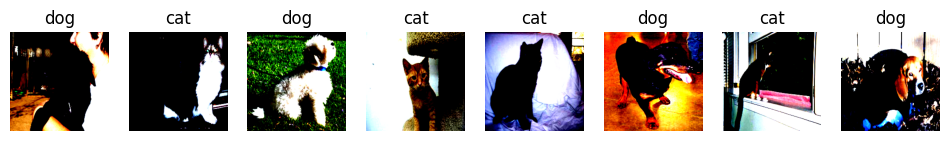

In [15]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(seed)
# Function to denormalize and convert tensor to numpy for visualization
def denormalizecat(image_tensor):
    image = image_tensor.numpy().transpose((1, 2, 0))  # Convert from Tensor shape (C, H, W) to (H, W, C)
    image = np.clip(image, 0, 1)  # Clip to ensure pixel values are in range [0, 1]
    return image

# Function to display a batch of images
def show_images(images, labels, class_names):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 12))
    for i, ax in enumerate(axes):
        img = denormalizecat(images[i])  # Denormalize each image
        ax.imshow(img)
        ax.set_title(class_names[labels[i]])
        ax.axis('off')
    plt.show()

# Get a batch of training data
images, labels = next(iter(train_loader))

# Class names based on ImageFolder
class_names = classes

# Visualize the batch of images
show_images(images[:8], labels[:8], class_names)  # Visualize first 5 images in the batch


### Set the device


In [13]:
import torch
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)} is available.")
else:
    print("No GPU available. Training will run on CPU.")


GPU: NVIDIA GeForce GTX 1060 6GB is available.


In [14]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Load the pretrained ResNet18 model
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [48]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    %pip install -q torchinfo
    from torchinfo import summary

In [49]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 2]              --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    └─BasicBlock (0)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (36,864)             False
│    │    

In [50]:
# Freeze all the layers in the base model
for param in model.parameters():
    param.requires_grad = False

# Modify the final fully connected layer for binary classification (2 classes)
model.fc = nn.Linear(model.fc.in_features, 2)

# Print a summary using torchinfo (uncomment for actual output)
summary(model=model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 2]              --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    └─BasicBlock (0)                    [32, 64, 56, 56]     [32, 64, 56, 56]     --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (36,864)             False
│    │    

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder


# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(classes)


# Define the loss function and optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)




In [22]:
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval() 

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(dataloader):
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch 
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for 
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]} 
    For example if training for epochs=2: 
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]} 
  """
  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)


  plt.plot(range(1, epochs + 1), results["train_loss"], 'bo-', label='Training Loss')
  plt.plot(range(1, epochs + 1), results["test_loss"], 'ro-', label='Test Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

    # 6. Return the filled results at the end of the epochs
  return results

/home/turkai/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 10%|█         | 1/10 [01:31<13:46, 91.78s/it]

Epoch: 1 | train_loss: 0.1227 | train_acc: 0.9545 | test_loss: 0.0548 | test_acc: 0.9800


 20%|██        | 2/10 [03:02<12:07, 90.94s/it]

Epoch: 2 | train_loss: 0.0848 | train_acc: 0.9665 | test_loss: 0.0603 | test_acc: 0.9757


 30%|███       | 3/10 [04:33<10:39, 91.36s/it]

Epoch: 3 | train_loss: 0.0784 | train_acc: 0.9688 | test_loss: 0.0461 | test_acc: 0.9824


 40%|████      | 4/10 [06:03<09:04, 90.72s/it]

Epoch: 4 | train_loss: 0.0778 | train_acc: 0.9687 | test_loss: 0.0712 | test_acc: 0.9707


 50%|█████     | 5/10 [07:34<07:32, 90.58s/it]

Epoch: 5 | train_loss: 0.0764 | train_acc: 0.9716 | test_loss: 0.0432 | test_acc: 0.9829


 60%|██████    | 6/10 [09:05<06:04, 91.03s/it]

Epoch: 6 | train_loss: 0.0809 | train_acc: 0.9685 | test_loss: 0.0451 | test_acc: 0.9810


 70%|███████   | 7/10 [10:38<04:34, 91.37s/it]

Epoch: 7 | train_loss: 0.0694 | train_acc: 0.9718 | test_loss: 0.0540 | test_acc: 0.9768


 80%|████████  | 8/10 [12:09<03:02, 91.28s/it]

Epoch: 8 | train_loss: 0.0765 | train_acc: 0.9698 | test_loss: 0.0474 | test_acc: 0.9797


 90%|█████████ | 9/10 [13:46<01:33, 93.16s/it]

Epoch: 9 | train_loss: 0.0705 | train_acc: 0.9726 | test_loss: 0.0481 | test_acc: 0.9797


100%|██████████| 10/10 [15:25<00:00, 92.55s/it]

Epoch: 10 | train_loss: 0.0681 | train_acc: 0.9743 | test_loss: 0.0479 | test_acc: 0.9789


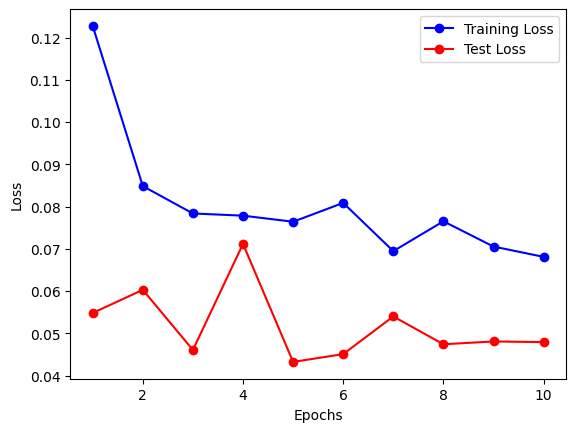

Total training time: 925.602 seconds


In [53]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10


# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model, 
                        train_dataloader=train_loader,
                        test_dataloader=test_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS,
                        device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

In [20]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Assuming your test_loader is already defined and your model is trained
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define a function to calculate precision, recall, and F1 score
def calculate_metrics(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    model.to(device)
    
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    with torch.no_grad():  # Disable gradient computation
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)  # Move to device
            outputs = model(images)  # Forward pass
            
            # Convert to predicted labels
            _, preds = torch.max(outputs, 1)  # For multi-class classification
            
            # Calculate True Positives (TP), False Positives (FP), and False Negatives (FN)
            true_positives += ((preds == 1) & (labels == 1)).sum().item()
            false_positives += ((preds == 1) & (labels == 0)).sum().item()
            false_negatives += ((preds == 0) & (labels == 1)).sum().item()

    # Calculate Precision: TP / (TP + FP)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0.0
    
    # Calculate Recall: TP / (TP + FN)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0.0
    
    # Calculate F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return precision, recall, f1_score

# Assuming you have a test_loader ready and your model is defined and trained
precision, recall, f1_score = calculate_metrics(model.to(device), validation_loader)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")



KeyboardInterrupt: 

Predicted class: cat


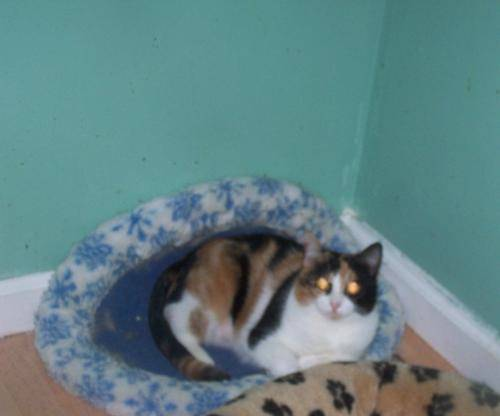

In [56]:
from PIL import Image

model = model.to(device)
model.eval()

# Transform the input image
image = Image.open("dogs-vs-cats/test1/120.jpg")
input_tensor = test_transforms(image).unsqueeze(0).to(device)

# Predict
with torch.no_grad():
    output = model(input_tensor)
    _, pred = torch.max(output, 1)
    print(f"Predicted class: {classes[pred.item()]}")

image


### tiny vgg with data augmentation

In [24]:
torch.manual_seed(seed)

torch.cuda.manual_seed(seed)

# Example data transformations
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
# Create testing transform (no data augmentation)
validation_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


In [25]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)
validation_data_simple = datasets.ImageFolder(validation_dir, transform=validation_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 18062
     Root location: dogs-vs-cats/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 3729
     Root location: dogs-vs-cats/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [26]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

validation_dataloader_simple = DataLoader(validation_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)
train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7660680b5270>,
 <torch.utils.data.dataloader.DataLoader at 0x76617c5e7f70>)

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class TinyVGG(nn.Module):
    def __init__(self, input_shape: tuple, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape[0], out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        

        self.flattened_size = 2560  # Set this manually based on your model architecture

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 2560),
            nn.ReLU(),
            nn.Linear(2560, output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

def calculate_metrics(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    model.to(device)
    
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient computation
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)  # Move to device
            outputs = model(images)  # Forward pass
            
            # Convert to predicted labels
            _, preds = torch.max(outputs, 1)  # For multi-class classification
            
            # Collect predictions and labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate Precision, Recall, and F1 Score
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return precision, recall, f1

def train(model, train_dataloader, test_dataloader, validation_dataloader_simple, optimizer, loss_fn, epochs, device, writer):
    
    model.to(device)
    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        
        for images, labels in train_dataloader:
            images, labels = images.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * images.size(0)

        
        epoch_train_loss = running_loss / len(train_dataloader.dataset)
        train_losses.append(epoch_train_loss)
        writer.add_scalar("Loss/train", epoch_train_loss, epoch)

        # Evaluate on the test set
        model.eval()
        test_running_loss = 0.0

        with torch.no_grad():
            for images, labels in test_dataloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                test_running_loss += loss.item() * images.size(0)

        # Example: Log some images during evaluation
        if epoch % 5 == 0:  # Log images every 5 epochs
            with torch.no_grad():
                sample_images, _ = next(iter(validation_dataloader_simple))
                sample_images = sample_images.to(device)
                outputs = model(sample_images)
                _, preds = torch.max(outputs, 1)
                grid = torchvision.utils.make_grid(sample_images.cpu())
                writer.add_image('Test Images', grid, epoch)

                

        epoch_test_loss = test_running_loss / len(test_dataloader.dataset)
        test_losses.append(epoch_test_loss)
        writer.add_scalar("Loss/test", epoch_test_loss, epoch)
        # Print loss and metrics for the current epoch
        precision, recall, f1 = calculate_metrics(model, test_dataloader, device)
        writer.add_scalar("Precision/test", precision, epoch)
        writer.add_scalar("Recall/test", recall, epoch)
        writer.add_scalar("F1/test", f1, epoch)


        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}')
        print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

    return train_losses, test_losses


'''writer = SummaryWriter()
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
model_1 = TinyVGG(input_shape=(3, 64, 64), hidden_units=10, output_shape=2).to(device)
# Add this line right after defining your model
writer.add_graph(model_1, torch.randn(1, 3, 64, 64).to(device))

optimizer = optim.Adam(params=model_1.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Start the timer
start_time = timer()

# Train model_1
train_losses, test_losses = train(model=model_1, 
                                  train_dataloader=train_dataloader_augmented,
                                  test_dataloader=test_dataloader_simple,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device)
writer.flush()
writer.close()
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()
'''


'writer = SummaryWriter()\n# Example usage\ndevice = torch.device(\'cuda\' if torch.cuda.is_available() else \'cpu\')\n\n# Initialize model, optimizer, and loss function\nmodel_1 = TinyVGG(input_shape=(3, 64, 64), hidden_units=10, output_shape=2).to(device)\n# Add this line right after defining your model\nwriter.add_graph(model_1, torch.randn(1, 3, 64, 64).to(device))\n\noptimizer = optim.Adam(params=model_1.parameters(), lr=0.001)\nloss_fn = nn.CrossEntropyLoss()\n\n\n# Set random seeds\ntorch.manual_seed(42)\ntorch.cuda.manual_seed(42)\n\n# Set number of epochs\nNUM_EPOCHS = 10\n\n# Start the timer\nstart_time = timer()\n\n# Train model_1\ntrain_losses, test_losses = train(model=model_1, \n                                  train_dataloader=train_dataloader_augmented,\n                                  test_dataloader=test_dataloader_simple,\n                                  optimizer=optimizer,\n                                  loss_fn=loss_fn, \n                                  

In [16]:
def load_image(image_path):
    # Open the image file
    image = Image.open(image_path).convert('RGB')
    # Apply transformations
    image = test_transform(image)
    # Add batch dimension
    image = image.unsqueeze(0)
    return image


In [17]:
def predict_image(model, image_path, device='cuda'):
    # Load the image
    image = load_image(image_path)
    # Move image to the appropriate device
    image = image.to(device)
    
    # Set the model to evaluation mode
    model.eval()
    
    with torch.no_grad():
        # Forward pass
        outputs = model(image)
        # Get predicted class index
        _, predicted = torch.max(outputs, 1)
    
    return predicted.item(), image


In [18]:
import matplotlib.pyplot as plt
import numpy as np

def tensor_to_image(tensor):
    # Remove the batch dimension and convert to NumPy array
    image = tensor.squeeze().cpu().numpy()
    
    # Transpose from (C, H, W) to (H, W, C) for plotting
    image = np.transpose(image, (1, 2, 0))

    
    # Clip values to be between 0 and 1
    image = np.clip(image, 0, 1)
    
    return image

def show_image(image_tensor):
    # Convert tensor to image
    image = tensor_to_image(image_tensor)
    
    # Plot the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()


Predicted class index: cat


TypeError: Invalid shape (3, 64, 64) for image data

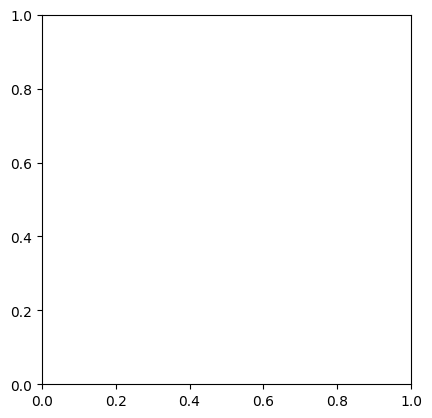

In [181]:
image_path = 'dogs-vs-cats/test1/32.jpg'
predicted_class, image = predict_image( model , image_path, device)

print(f'Predicted class index: {classes[predicted_class]}')

show_image(image)

Epoch 1/20, Train Loss: 0.6922, Test Loss: 0.6868
Precision: 0.5876, Recall: 0.5872, F1 Score: 0.5862
Epoch 2/20, Train Loss: 0.6777, Test Loss: 0.6359
Precision: 0.6624, Recall: 0.6616, F1 Score: 0.6609
Epoch 3/20, Train Loss: 0.6395, Test Loss: 0.5851
Precision: 0.7013, Recall: 0.7002, F1 Score: 0.6999
Epoch 4/20, Train Loss: 0.6126, Test Loss: 0.5529
Precision: 0.7179, Recall: 0.7170, F1 Score: 0.7166
Epoch 5/20, Train Loss: 0.5937, Test Loss: 0.5290
Precision: 0.7383, Recall: 0.7379, F1 Score: 0.7379
Epoch 6/20, Train Loss: 0.5778, Test Loss: 0.5373
Precision: 0.7456, Recall: 0.7371, F1 Score: 0.7345
Epoch 7/20, Train Loss: 0.5621, Test Loss: 0.5124
Precision: 0.7546, Recall: 0.7546, F1 Score: 0.7546
Epoch 8/20, Train Loss: 0.5474, Test Loss: 0.5062
Precision: 0.7583, Recall: 0.7546, F1 Score: 0.7535
Epoch 9/20, Train Loss: 0.5381, Test Loss: 0.5033
Precision: 0.7713, Recall: 0.7578, F1 Score: 0.7544
Epoch 10/20, Train Loss: 0.5256, Test Loss: 0.4927
Precision: 0.7690, Recall: 0.76

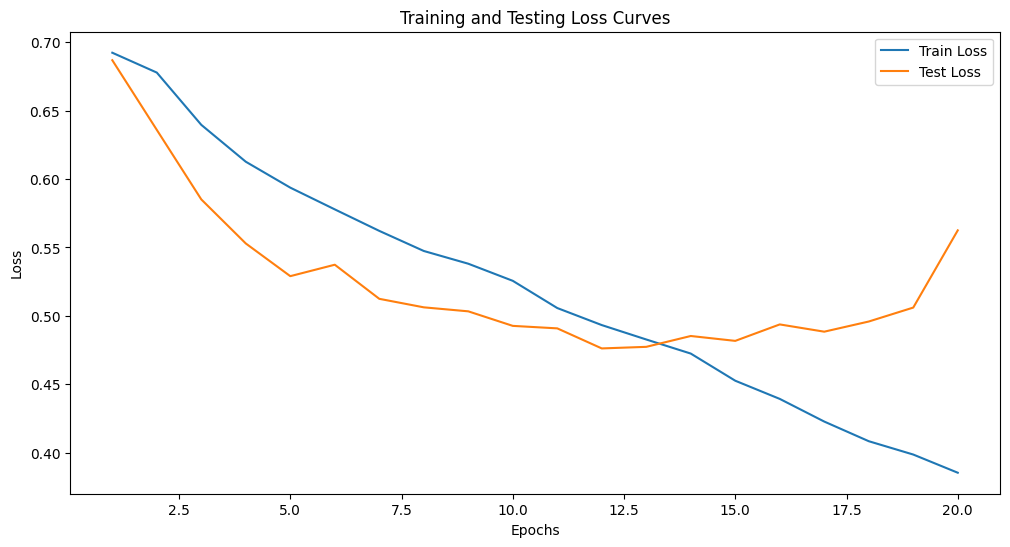

In [173]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class TinyVGG_2(nn.Module):
    def __init__(self, input_shape: tuple, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape[0], out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.dropout = nn.Dropout(p=0.5)  # Dropout with 50% probability

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size(input_shape, hidden_units)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 2560),
            nn.ReLU(),
            nn.Linear(2560, output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

    def _get_flattened_size(self, input_shape, hidden_units):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Create a dummy input
            x = self.conv_block_1(dummy_input)
            x = self.conv_block_2(x)
            return x.numel()  # Return the number of elements in the flattened tensor

# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
model_2 = TinyVGG_2(input_shape=(3, 64, 64), hidden_units=10, output_shape=2).to(device)
optimizer = optim.Adam(params=model_2.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Start the timer
start_time = timer()

# Train model_2
train_losses, test_losses = train(model=model_2, 
                                  train_dataloader=train_dataloader_augmented,
                                  test_dataloader=test_dataloader_simple,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()




Predicted class index: cat


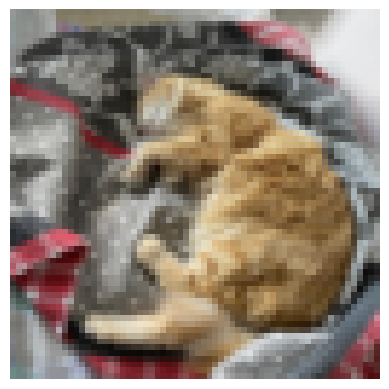

In [190]:
image_path = 'tarcin2.jpeg'
predicted_class, image = predict_image(model_2, image_path, device)

print(f'Predicted class index: {classes[predicted_class]}')

show_image(image)

In [177]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    %pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the following:
# - `model`: Your trained model
# - `test_dataloader`: DataLoader for your test dataset
# - `device`: The device you're using (CPU or GPU)

# Function to get predictions and actual labels
def get_predictions_and_labels(model, dataloader, device):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_preds, all_labels

# Get predictions and labels
'''predictions, labels = get_predictions_and_labels(model_1, validation_dataloader_simple, device)

# Generate confusion matrix
cm = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()'''


'predictions, labels = get_predictions_and_labels(model_1, validation_dataloader_simple, device)\n\n# Generate confusion matrix\ncm = confusion_matrix(labels, predictions)\n\n# Display confusion matrix\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm)\ndisp.plot(cmap=plt.cm.Blues)\nplt.title("Confusion Matrix")\nplt.show()'

In [159]:

# Get predictions and labels
predictions, labels = get_predictions_and_labels( model=model, dataloader= train_loader, device= device)

# Generate confusion matrix
cm = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x100352 and 8192x2560)

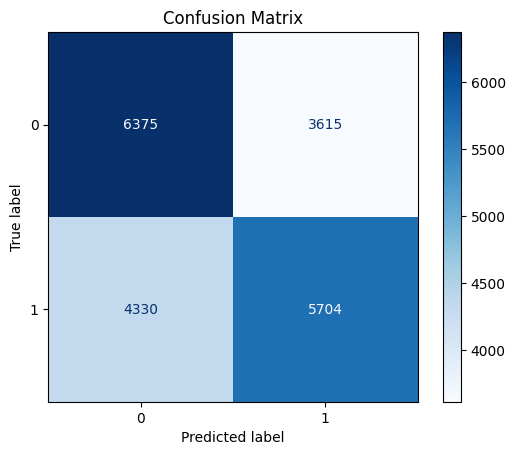

In [183]:


# Get predictions and labels
predictions, labels = get_predictions_and_labels(model, train_dataloader_augmented, device)

# Generate confusion matrix
cm = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Regularization Added

Epoch 1/23, Train Loss: 0.6942, Test Loss: 0.6932
Precision: 0.2467, Recall: 0.4966, F1 Score: 0.3296


/home/turkai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/23, Train Loss: 0.6934, Test Loss: 0.6932
Precision: 0.5487, Recall: 0.4969, F1 Score: 0.3312
Epoch 3/23, Train Loss: 0.6896, Test Loss: 0.6741
Precision: 0.5825, Recall: 0.5784, F1 Score: 0.5720
Epoch 4/23, Train Loss: 0.6779, Test Loss: 0.6614
Precision: 0.6123, Recall: 0.6122, F1 Score: 0.6120
Epoch 5/23, Train Loss: 0.6688, Test Loss: 0.6525
Precision: 0.6110, Recall: 0.6095, F1 Score: 0.6078
Epoch 6/23, Train Loss: 0.6617, Test Loss: 0.6331
Precision: 0.6330, Recall: 0.6329, F1 Score: 0.6327
Epoch 7/23, Train Loss: 0.6539, Test Loss: 0.6389
Precision: 0.6349, Recall: 0.6243, F1 Score: 0.6176
Epoch 8/23, Train Loss: 0.6433, Test Loss: 0.6231
Precision: 0.6791, Recall: 0.6471, F1 Score: 0.6296
Epoch 9/23, Train Loss: 0.6294, Test Loss: 0.6195
Precision: 0.6878, Recall: 0.6482, F1 Score: 0.6275
Epoch 10/23, Train Loss: 0.6194, Test Loss: 0.5792
Precision: 0.7038, Recall: 0.7015, F1 Score: 0.7005
Epoch 11/23, Train Loss: 0.6070, Test Loss: 0.5680
Precision: 0.7142, Recall: 0.7

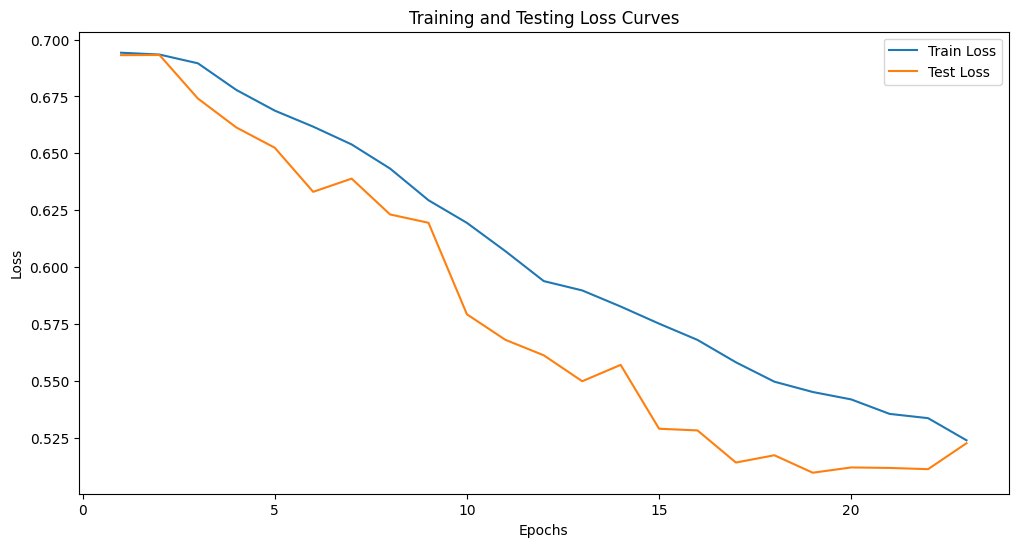

In [31]:
import torch
import PIL
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class TinyVGG_2(nn.Module):
    def __init__(self, input_shape: tuple, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape[0], out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.dropout = nn.Dropout(p=0.5)  # Dropout with 50% probability

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size(input_shape, hidden_units)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 2560),
            nn.ReLU(),
            self.dropout,  # Apply dropout after the first linear layer
            nn.Linear(2560, output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

    def _get_flattened_size(self, input_shape, hidden_units):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Create a dummy input
            x = self.conv_block_1(dummy_input)
            x = self.conv_block_2(x)
            return x.numel()  # Return the number of elements in the flattened tensor

writer = SummaryWriter()
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
model_2 = TinyVGG_2(input_shape=(3, 64, 64), hidden_units=10, output_shape=2).to(device)
optimizer = optim.Adam(params=model_2.parameters(), lr=0.001)  # Try increasing/decreasing the learning rate
loss_fn = nn.CrossEntropyLoss()

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 23

# Start the timer
start_time = timer()

# Train model_2
train_losses, test_losses = train(model=model_2, 
                                  train_dataloader=train_dataloader_augmented,
                                  test_dataloader=test_dataloader_simple,
                                  validation_dataloader_simple=validation_dataloader_simple,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device,
                                  writer=writer)
writer.flush()
writer.close()
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()


In [85]:
import PIL
print(PIL.__version__)
%pip install --upgrade Pillow


9.0.1
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:

# Get predictions and labels
predictions, labels = get_predictions_and_labels(model_2, validation_dataloader_simple, device)

# Generate confusion matrix
cm = confusion_matrix(labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

NameError: name 'model_2' is not defined

Predicted class index: cat


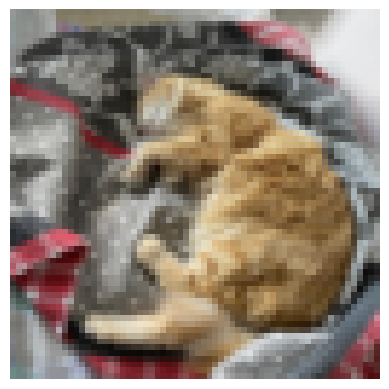

In [208]:
image_path = 'tarcin2.jpeg'
predicted_class, image = predict_image(model_2, image_path, device)

print(f'Predicted class index: {classes[predicted_class]}')

show_image(image)

In [68]:

# Example data transformations
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomRotation(0.4),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
# Create testing transform (no data augmentation)
validation_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

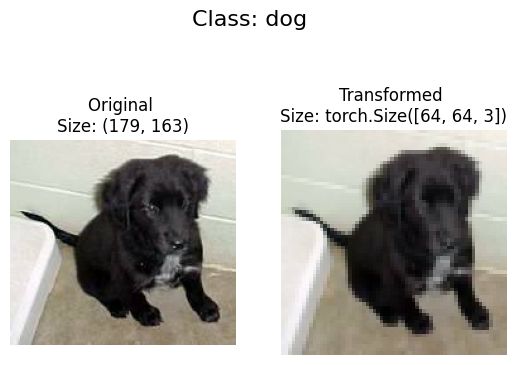

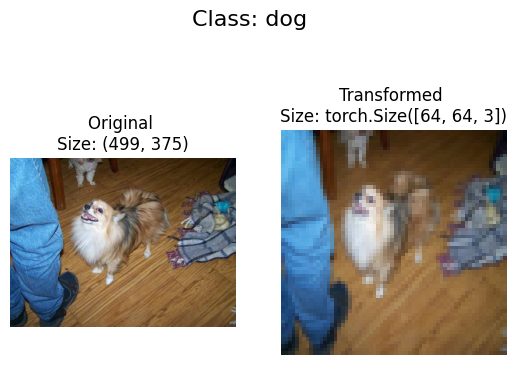

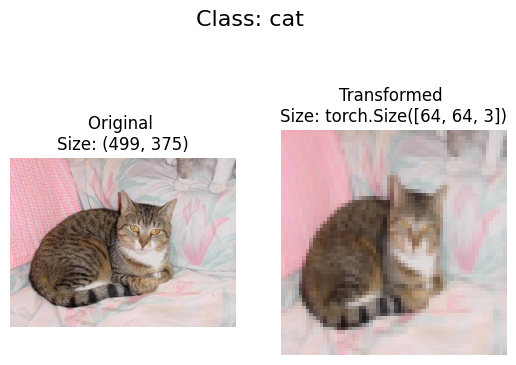

In [69]:
plot_transformed_images(image_paths= image_path_list, transform= train_transform_trivial_augment, seed= seed)

Epoch 1/50, Train Loss: 0.6818, Test Loss: 0.6259
Precision: 0.6667, Recall: 0.6653, F1 Score: 0.6648
Epoch 2/50, Train Loss: 0.6468, Test Loss: 0.6216
Precision: 0.6979, Recall: 0.6838, F1 Score: 0.6776
Epoch 3/50, Train Loss: 0.6228, Test Loss: 0.5807
Precision: 0.7013, Recall: 0.6927, F1 Score: 0.6897
Epoch 4/50, Train Loss: 0.6045, Test Loss: 0.5585
Precision: 0.7310, Recall: 0.7308, F1 Score: 0.7307
Epoch 5/50, Train Loss: 0.5906, Test Loss: 0.5404
Precision: 0.7314, Recall: 0.7313, F1 Score: 0.7312
Epoch 6/50, Train Loss: 0.5754, Test Loss: 0.5381
Precision: 0.7409, Recall: 0.7361, F1 Score: 0.7350
Epoch 7/50, Train Loss: 0.5667, Test Loss: 0.5133
Precision: 0.7590, Recall: 0.7578, F1 Score: 0.7575
Epoch 8/50, Train Loss: 0.5568, Test Loss: 0.5042
Precision: 0.7643, Recall: 0.7611, F1 Score: 0.7602
Epoch 9/50, Train Loss: 0.5440, Test Loss: 0.5170
Precision: 0.7620, Recall: 0.7514, F1 Score: 0.7486
Epoch 10/50, Train Loss: 0.5394, Test Loss: 0.4793
Precision: 0.7823, Recall: 0.78

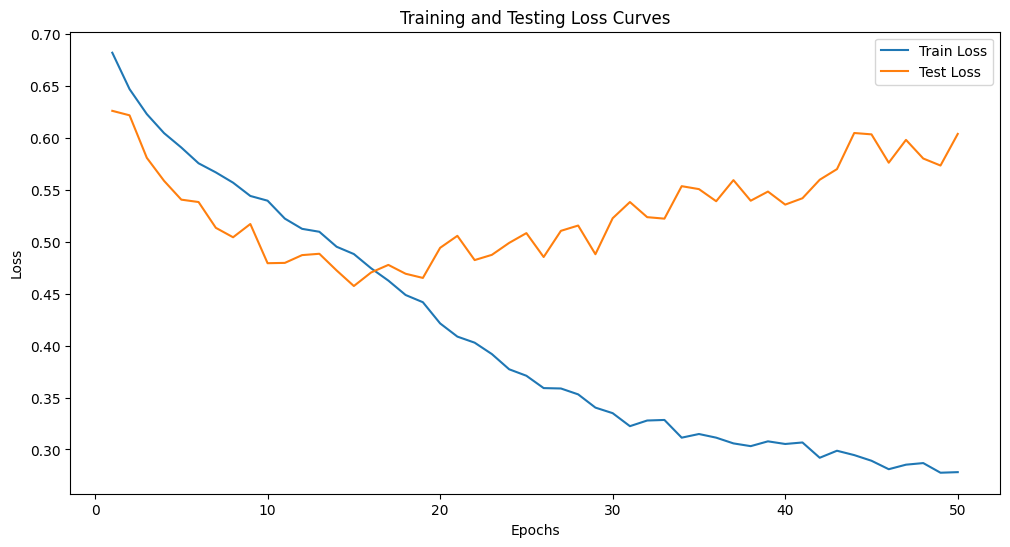

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class TinyVGG_3(nn.Module):
    def __init__(self, input_shape: tuple, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape[0], out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.dropout = nn.Dropout(p=0.5)  # Dropout with 50% probability

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size(input_shape, hidden_units)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 2560),
            nn.ReLU(),
            self.dropout,  # Apply dropout after the first linear layer
            nn.Linear(2560, output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

    def _get_flattened_size(self, input_shape, hidden_units):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Create a dummy input
            x = self.conv_block_1(dummy_input)
            x = self.conv_block_2(x)
            return x.numel()  # Return the number of elements in the flattened tensor

writer = SummaryWriter()
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
model_5 = TinyVGG_2(input_shape=(3, 64, 64), hidden_units=10, output_shape=2).to(device)
optimizer = optim.Adam(params=model_5.parameters(), lr=0.001)  # Try increasing/decreasing the learning rate
loss_fn = nn.CrossEntropyLoss()

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Start the timer
start_time = timer()

# Train model_2
train_losses, test_losses = train(model=model_5, 
                                  train_dataloader=train_dataloader_augmented,
                                  validation_dataloader_simple=validation_dataloader_simple,
                                  test_dataloader=test_dataloader_simple,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device,
                                  writer=writer)

writer.flush()
writer.close()
# End the timer and print out how long it took
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()


In [85]:
# Example data transformations
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomRotation(0.4),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.1),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
# Create testing transform (no data augmentation)
validation_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [86]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

validation_dataloader_simple = DataLoader(validation_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)
train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x76606b4693c0>,
 <torch.utils.data.dataloader.DataLoader at 0x76606b46aad0>)

In [90]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class TinyVGG_4(nn.Module):
    def __init__(self, input_shape: tuple, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape[0], out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.dropout = nn.Dropout(p=0.5)  # Dropout with 50% probability

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size(input_shape, hidden_units)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 2560),
            nn.ReLU(),
            self.dropout,  # Apply dropout after the first linear layer
            nn.Linear(2560, output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

    def _get_flattened_size(self, input_shape, hidden_units):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Create a dummy input
            x = self.conv_block_1(dummy_input)
            x = self.conv_block_2(x)
            return x.numel()  # Return the number of elements in the flattened tensor

writer = SummaryWriter()
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
model_6 = TinyVGG_2(input_shape=(3, 64, 64), hidden_units=10, output_shape=2).to(device)
optimizer = optim.Adam(params=model_6.parameters(), lr=1e-3, weight_decay=1e-4)  # Try increasing/decreasing the learning rate
loss_fn = nn.CrossEntropyLoss()

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 80

# Start the timer
start_time = timer()

# Train model_2
train_losses, test_losses = train(model=model_6, 
                                  train_dataloader=train_dataloader_augmented,
                                  validation_dataloader_simple=validation_dataloader_simple,
                                  test_dataloader=test_dataloader_simple,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device,
                                  writer=writer)

writer.flush()
writer.close()
# End the timer and print out how long it took
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()


Epoch 1/80, Train Loss: 0.6937, Test Loss: 0.6932
Precision: 0.2467, Recall: 0.4966, F1 Score: 0.3296


/home/turkai/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/80, Train Loss: 0.6929, Test Loss: 0.6859
Precision: 0.5813, Recall: 0.5720, F1 Score: 0.5611
Epoch 3/80, Train Loss: 0.6882, Test Loss: 0.6755
Precision: 0.5850, Recall: 0.5835, F1 Score: 0.5810
Epoch 4/80, Train Loss: 0.6794, Test Loss: 0.6520
Precision: 0.6202, Recall: 0.6184, F1 Score: 0.6173
Epoch 5/80, Train Loss: 0.6581, Test Loss: 0.6356
Precision: 0.6404, Recall: 0.6337, F1 Score: 0.6286
Epoch 6/80, Train Loss: 0.6448, Test Loss: 0.6014
Precision: 0.6913, Recall: 0.6905, F1 Score: 0.6901
Epoch 7/80, Train Loss: 0.6331, Test Loss: 0.5968
Precision: 0.6762, Recall: 0.6688, F1 Score: 0.6657
Epoch 8/80, Train Loss: 0.6221, Test Loss: 0.5844
Precision: 0.6963, Recall: 0.6916, F1 Score: 0.6895
Epoch 9/80, Train Loss: 0.6094, Test Loss: 0.5550
Precision: 0.7240, Recall: 0.7203, F1 Score: 0.7189
Epoch 10/80, Train Loss: 0.6013, Test Loss: 0.5524
Precision: 0.7296, Recall: 0.7267, F1 Score: 0.7260
Epoch 11/80, Train Loss: 0.5908, Test Loss: 0.5363
Precision: 0.7352, Recall: 0.7

KeyboardInterrupt: 

In [43]:
import torch
from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path)
  

In [92]:
save_model(model=model_6,target_dir="models", model_name="l2-dropout-augmentation-model.pth")

[INFO] Saving model to: models/l2-dropout-augmentation-model.pth


### Try SGD

In [124]:
# Example data transformations
train_transform_trivial_augment2 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomRotation(0.4),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

# Create testing transform (no data augmentation)
test_transform2 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])
# Create testing transform (no data augmentation)
validation_transform2 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

In [125]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment2)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform2)
validation_data_simple = datasets.ImageFolder(validation_dir, transform=validation_transform2)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 18062
     Root location: dogs-vs-cats/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomRotation(degrees=[-0.4, 0.4], interpolation=nearest, expand=False, fill=0)
                RandomPerspective(p=0.3)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 3729
     Root location: dogs-vs-cats/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [126]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented2 = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple2 = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

validation_dataloader_simple2= DataLoader(validation_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)
train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x741c356adc60>,
 <torch.utils.data.dataloader.DataLoader at 0x741c35f74d90>)

In [127]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class TinyVGG_4(nn.Module):
    def __init__(self, input_shape: tuple, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape[0], out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.dropout = nn.Dropout(p=0.5)  # Dropout with 50% probability

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size(input_shape, hidden_units)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 2560),
            nn.ReLU(),
            self.dropout,  # Apply dropout after the first linear layer
            nn.Linear(2560, output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

    def _get_flattened_size(self, input_shape, hidden_units):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Create a dummy input
            x = self.conv_block_1(dummy_input)
            x = self.conv_block_2(x)
            return x.numel()  # Return the number of elements in the flattened tensor

writer = SummaryWriter()
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
model_8 = TinyVGG_4(input_shape=(3, 64, 64), hidden_units=10, output_shape=2).to(device)

optimizer = optim.Adam(params=model_8.parameters(), lr=1e-3, weight_decay=1e-5)  # Try increasing/decreasing the learning rate

loss_fn = nn.CrossEntropyLoss()

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 80

# Start the timer
start_time = timer()

# Train model_2
train_losses, test_losses = train(model=model_8, 
                                  train_dataloader=train_dataloader_augmented2,
                                  validation_dataloader_simple=validation_dataloader_simple2,
                                  test_dataloader=test_dataloader_simple2,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device,
                                  writer=writer)

writer.flush()
writer.close()
# End the timer and print out how long it took
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()

Epoch 1/80, Train Loss: 0.6644, Test Loss: 0.6055
Precision: 0.6845, Recall: 0.6702, F1 Score: 0.6642
Epoch 2/80, Train Loss: 0.5894, Test Loss: 0.5657
Precision: 0.7284, Recall: 0.7222, F1 Score: 0.7200
Epoch 3/80, Train Loss: 0.5436, Test Loss: 0.4966
Precision: 0.7557, Recall: 0.7557, F1 Score: 0.7557
Epoch 4/80, Train Loss: 0.5068, Test Loss: 0.5065
Precision: 0.7453, Recall: 0.7418, F1 Score: 0.7410


KeyboardInterrupt: 

In [ ]:
# Example data transformations
train_transform_trivial_augment3 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomRotation(0.4),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

# Create testing transform (no data augmentation)
test_transform3 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])
# Create testing transform (no data augmentation)
validation_transform3 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

In [ ]:
# Turn image folders into Datasets
train_data_augmented3 = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment3)
test_data_simple3 = datasets.ImageFolder(test_dir, transform=test_transform3)
validation_data_simple3 = datasets.ImageFolder(validation_dir, transform=validation_transform3)

train_data_augmented3, test_data_simple3

(Dataset ImageFolder
     Number of datapoints: 18062
     Root location: dogs-vs-cats/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomRotation(degrees=[-0.4, 0.4], interpolation=nearest, expand=False, fill=0)
                RandomPerspective(p=0.3)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 3729
     Root location: dogs-vs-cats/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[

In [ ]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented3 = DataLoader(train_data_augmented3, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple3 = DataLoader(test_data_simple3, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

validation_dataloader_simple3= DataLoader(validation_data_simple3, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)
train_dataloader_augmented3, test_dataloader_simple3

(<torch.utils.data.dataloader.DataLoader at 0x741c1c924790>,
 <torch.utils.data.dataloader.DataLoader at 0x741c357e1cc0>)

In [118]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class TinyVGG_4(nn.Module):
    def __init__(self, input_shape: tuple, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape[0], out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.dropout = nn.Dropout(p=0.5)  # Dropout with 50% probability

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size(input_shape, hidden_units)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 2560),
            nn.ReLU(),
            self.dropout,  # Apply dropout after the first linear layer
            nn.Linear(2560, output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

    def _get_flattened_size(self, input_shape, hidden_units):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Create a dummy input
            x = self.conv_block_1(dummy_input)
            x = self.conv_block_2(x)
            return x.numel()  # Return the number of elements in the flattened tensor

writer = SummaryWriter()
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
model_7 = TinyVGG_4(input_shape=(3, 64, 64), hidden_units=10, output_shape=2).to(device)

optimizer = optim.AdamW(params=model_7.parameters(), lr=1e-3, weight_decay=1e-4)

loss_fn = nn.CrossEntropyLoss()

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 80

# Start the timer
start_time = timer()

# Train model_2
train_losses, test_losses = train(model=model_7, 
                                  train_dataloader=train_dataloader_augmented3,
                                  validation_dataloader_simple=validation_dataloader_simple3,
                                  test_dataloader=test_dataloader_simple3,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device,
                                  writer=writer)

writer.flush()
writer.close()
# End the timer and print out how long it took
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()

Epoch 1/80, Train Loss: 0.6277, Test Loss: 0.5664
Precision: 0.7237, Recall: 0.7230, F1 Score: 0.7228
Epoch 2/80, Train Loss: 0.5662, Test Loss: 0.5246
Precision: 0.7539, Recall: 0.7436, F1 Score: 0.7413


KeyboardInterrupt: 

add l1 regularization too

In [19]:
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from typing import Dict, List, Tuple
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

def calculate_metrics(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    model.to(device)
    
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient computation
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)  # Move to device
            outputs = model(images)  # Forward pass
            
            # Convert to predicted labels
            _, preds = torch.max(outputs, 1)  # For multi-class classification
            
            # Collect predictions and labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate Precision, Recall, and F1 Score
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return accuracy, precision, recall, f1

def train2(model, train_dataloader, test_dataloader, validation_dataloader_simple, optimizer, loss_fn, epochs, device, writer, l1_lambda=0.001, scheduler = None):
    
    model.to(device)
    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        
        for images, labels in train_dataloader:
            images, labels = images.to(device), labels.to(device)

            # Backward pass and optimization
            optimizer.zero_grad()
            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            
            # L1 regularization
            l1_reg = torch.tensor(0., device=device)  # Initialize on the correct device
            for param in model.parameters():
                l1_reg = l1_reg + torch.sum(torch.abs(param))  # Avoid in-place operation
            loss = loss + l1_lambda * l1_reg
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * images.size(0)

        
        epoch_train_loss = running_loss / len(train_dataloader.dataset)
        train_losses.append(epoch_train_loss)
        writer.add_scalar("Loss/train", epoch_train_loss, epoch)

        # Evaluate on the test set
        model.eval()
        test_running_loss = 0.0

        with torch.no_grad():
            for images, labels in test_dataloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                test_running_loss += loss.item() * images.size(0)

                

        epoch_test_loss = test_running_loss / len(test_dataloader.dataset)
        test_losses.append(epoch_test_loss)
        writer.add_scalar("Loss/test", epoch_test_loss, epoch)
        
        # Calculate and log metrics for the test set
        accuracy, precision, recall, f1 = calculate_metrics(model, test_dataloader, device)
        writer.add_scalar("Precision/test", precision, epoch)
        writer.add_scalar("Recall/test", recall, epoch)
        writer.add_scalar("F1/test", f1, epoch)
        writer.add_scalar("Accuracy/test", accuracy, epoch)


        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}')
        print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

        if scheduler:
            scheduler.step(epoch_test_loss)

    
            # Print the learning rate after adjustment
            print(f"Learning Rate: {scheduler.optimizer.param_groups[0]['lr']}")

    return train_losses, test_losses


/home/turkai/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# Example data transformations
train_transform_trivial_augment3 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomRotation(0.4),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

# Create testing transform (no data augmentation)
test_transform3 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])
# Create testing transform (no data augmentation)
validation_transform3 = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

In [21]:
# Turn image folders into Datasets
train_data_augmented3 = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment3)
test_data_simple3 = datasets.ImageFolder(test_dir, transform=test_transform3)
validation_data_simple3 = datasets.ImageFolder(validation_dir, transform=validation_transform3)

train_data_augmented3, test_data_simple3

(Dataset ImageFolder
     Number of datapoints: 18133
     Root location: dogs-vs-cats/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomRotation(degrees=[-0.4, 0.4], interpolation=nearest, expand=False, fill=0)
                RandomPerspective(p=0.3)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 3739
     Root location: dogs-vs-cats/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [22]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented3 = DataLoader(train_data_augmented3, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple3 = DataLoader(test_data_simple3, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

validation_dataloader_simple3= DataLoader(validation_data_simple3, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)
train_dataloader_augmented3, test_dataloader_simple3

(<torch.utils.data.dataloader.DataLoader at 0x78afc280f970>,
 <torch.utils.data.dataloader.DataLoader at 0x78b0aa1256f0>)

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class TinyVGG_4(nn.Module):
    def __init__(self, input_shape: tuple, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape[0], out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(32, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.dropout = nn.Dropout(p=0.5)  # Dropout with 50% probability

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size(input_shape, hidden_units)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 2560),
            nn.ReLU(),
            self.dropout,  # Apply dropout after the first linear layer
            nn.Linear(2560, output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

    def _get_flattened_size(self, input_shape, hidden_units):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Create a dummy input
            x = self.conv_block_1(dummy_input)
            x = self.conv_block_2(x)
            return x.numel()  # Return the number of elements in the flattened tensor

writer = SummaryWriter()
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
model_7 = TinyVGG_4(input_shape=(3, 64, 64), hidden_units=124, output_shape=2).to(device)

optimizer = optim.AdamW(params=model_7.parameters(), lr=1e-3, weight_decay=1e-4)

scheduler = ReduceLROnPlateau(optimizer=optimizer, mode= 'min', factor= 0.1)

loss_fn = nn.CrossEntropyLoss()

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 130

# Start the timer
start_time = timer()

# Train model_2
train_losses, test_losses = train2(model=model_7, 
                                  train_dataloader=train_dataloader_augmented3,
                                  validation_dataloader_simple=validation_dataloader_simple3,
                                  test_dataloader=test_dataloader_simple3,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device,
                                  writer=writer,
                                  l1_lambda=0.00001,
                                  scheduler=scheduler)

writer.flush()
writer.close()
# End the timer and print out how long it took
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()

Epoch 1/130, Train Loss: 0.8773, Test Loss: 0.6738
Precision: 0.5477, Recall: 0.5338, F1 Score: 0.5006
Learning Rate: 0.001
Epoch 2/130, Train Loss: 0.8045, Test Loss: 0.6215
Precision: 0.6438, Recall: 0.6438, F1 Score: 0.6437
Learning Rate: 0.001
Epoch 3/130, Train Loss: 0.7676, Test Loss: 0.5524
Precision: 0.7177, Recall: 0.7176, F1 Score: 0.7176
Learning Rate: 0.001
Epoch 4/130, Train Loss: 0.7168, Test Loss: 0.5124
Precision: 0.7591, Recall: 0.7539, F1 Score: 0.7526
Learning Rate: 0.001
Epoch 5/130, Train Loss: 0.6694, Test Loss: 0.4752
Precision: 0.7835, Recall: 0.7735, F1 Score: 0.7713
Learning Rate: 0.001
Epoch 6/130, Train Loss: 0.6430, Test Loss: 0.4221
Precision: 0.8076, Recall: 0.8061, F1 Score: 0.8059
Learning Rate: 0.001
Epoch 7/130, Train Loss: 0.6168, Test Loss: 0.4010
Precision: 0.8134, Recall: 0.8131, F1 Score: 0.8130
Learning Rate: 0.001
Epoch 8/130, Train Loss: 0.5890, Test Loss: 0.3714
Precision: 0.8369, Recall: 0.8361, F1 Score: 0.8359
Learning Rate: 0.001
Epoch 9/

KeyboardInterrupt: 

In [45]:
torch.cuda.empty_cache()

In [46]:
tensor = torch.randn(1000, 1000).cuda()
# Do something with tensor
del tensor
torch.cuda.empty_cache()


# 94 Accuracy

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class TinyVGG_5(nn.Module):
    def __init__(self, input_shape: tuple, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape[0], out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)       
                            )
        self.dropout = nn.Dropout(p=0.3)  # Dropout with 50% probability

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size(input_shape, hidden_units)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 2560),
            nn.ReLU(),
            self.dropout,  # Apply dropout after the first linear layer
            nn.Linear(2560, output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.classifier(x)
        return x

    def _get_flattened_size(self, input_shape, hidden_units):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Create a dummy input
            x = self.conv_block_1(dummy_input)
            x = self.conv_block_2(x)
            x = self.conv_block_3(x)
            return x.numel()  # Return the number of elements in the flattened tensor

writer = SummaryWriter()
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
model_8 = TinyVGG_5(input_shape=(3, 64, 64), hidden_units=132, output_shape=2).to(device)

optimizer = optim.AdamW(params=model_8.parameters(), lr=1e-3, weight_decay=1e-1)

scheduler = ReduceLROnPlateau(optimizer=optimizer, mode= 'min', factor= 0.1)

loss_fn = nn.CrossEntropyLoss()

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 130

# Start the timer
start_time = timer()

# Train model_2
train_losses, test_losses = train2(model=model_8, 
                                  train_dataloader=train_dataloader_augmented3,
                                  validation_dataloader_simple=validation_dataloader_simple3,
                                  test_dataloader=test_dataloader_simple3,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device,
                                  writer=writer,
                                  l1_lambda=0.000001,
                                  scheduler=scheduler)

writer.flush()
writer.close()
# End the timer and print out how long it took
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()

Epoch 1/130, Train Loss: 0.6981, Test Loss: 0.6483
Precision: 0.6298, Recall: 0.6170, F1 Score: 0.6080
Learning Rate: 0.001
Epoch 2/130, Train Loss: 0.6605, Test Loss: 0.6205
Precision: 0.6529, Recall: 0.6472, F1 Score: 0.6442
Learning Rate: 0.001
Epoch 3/130, Train Loss: 0.6231, Test Loss: 0.5390
Precision: 0.7330, Recall: 0.7320, F1 Score: 0.7318
Learning Rate: 0.001
Epoch 4/130, Train Loss: 0.5561, Test Loss: 0.4729
Precision: 0.7867, Recall: 0.7826, F1 Score: 0.7817
Learning Rate: 0.001
Epoch 5/130, Train Loss: 0.4890, Test Loss: 0.4318
Precision: 0.8114, Recall: 0.8098, F1 Score: 0.8096
Learning Rate: 0.001
Epoch 6/130, Train Loss: 0.4435, Test Loss: 0.4447
Precision: 0.8257, Recall: 0.8007, F1 Score: 0.7967
Learning Rate: 0.001
Epoch 7/130, Train Loss: 0.4019, Test Loss: 0.3512
Precision: 0.8539, Recall: 0.8497, F1 Score: 0.8492
Learning Rate: 0.001
Epoch 8/130, Train Loss: 0.3768, Test Loss: 0.3468
Precision: 0.8584, Recall: 0.8508, F1 Score: 0.8500
Learning Rate: 0.001
Epoch 9/

KeyboardInterrupt: 

Exactly what task wanted

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class TinyVGG_5(nn.Module):
    def __init__(self, input_shape: tuple, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape[0], out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.dropout = nn.Dropout(p=0.3)  # Dropout with 50% probability

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size(input_shape, hidden_units)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flattened_size, 2560),
            nn.ReLU(),
            self.dropout,  # Apply dropout after the first linear layer
            nn.Linear(2560, output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.classifier(x)
        return x

    def _get_flattened_size(self, input_shape, hidden_units):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Create a dummy input
            x = self.conv_block_1(dummy_input)

            return x.numel()  # Return the number of elements in the flattened tensor

writer = SummaryWriter()
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
model_8 = TinyVGG_5(input_shape=(3, 64, 64), hidden_units=64, output_shape=2).to(device)

optimizer = optim.AdamW(params=model_8.parameters(), lr=1e-3, weight_decay=1e-4)

scheduler = ReduceLROnPlateau(optimizer=optimizer, mode= 'min', factor= 0.1)

loss_fn = nn.CrossEntropyLoss()

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 130

# Start the timer
start_time = timer()

# Train model_2
train_losses, test_losses = train2(model=model_8, 
                                  train_dataloader=train_dataloader_augmented3,
                                  validation_dataloader_simple=validation_dataloader_simple3,
                                  test_dataloader=test_dataloader_simple3,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device,
                                  writer=writer,
                                  l1_lambda=0.000001,
                                  scheduler=scheduler)

writer.flush()
writer.close()
# End the timer and print out how long it took
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()

Epoch 1/130, Train Loss: 0.8513, Test Loss: 0.5613
Precision: 0.7042, Recall: 0.7037, F1 Score: 0.7034
Learning Rate: 0.001
Epoch 2/130, Train Loss: 0.6713, Test Loss: 0.4995
Precision: 0.7680, Recall: 0.7601, F1 Score: 0.7584
Learning Rate: 0.001
Epoch 3/130, Train Loss: 0.6302, Test Loss: 0.4631
Precision: 0.7804, Recall: 0.7804, F1 Score: 0.7804
Learning Rate: 0.001
Epoch 4/130, Train Loss: 0.6092, Test Loss: 0.4556
Precision: 0.7989, Recall: 0.7986, F1 Score: 0.7986
Learning Rate: 0.001
Epoch 5/130, Train Loss: 0.5834, Test Loss: 0.4314
Precision: 0.8055, Recall: 0.8042, F1 Score: 0.8040
Learning Rate: 0.001
Epoch 6/130, Train Loss: 0.5676, Test Loss: 0.4246
Precision: 0.8180, Recall: 0.8173, F1 Score: 0.8173
Learning Rate: 0.001
Epoch 7/130, Train Loss: 0.5490, Test Loss: 0.4510
Precision: 0.8051, Recall: 0.7965, F1 Score: 0.7949
Learning Rate: 0.001
Epoch 8/130, Train Loss: 0.5459, Test Loss: 0.4186
Precision: 0.8227, Recall: 0.8227, F1 Score: 0.8227
Learning Rate: 0.001
Epoch 9/

KeyboardInterrupt: 

Epoch 1/20, Train Loss: 0.3412, Test Loss: 0.2032
Precision: 0.9157, Recall: 0.9139, F1 Score: 0.9138
Epoch 2/20, Train Loss: 0.3208, Test Loss: 0.2004
Precision: 0.9273, Recall: 0.9270, F1 Score: 0.9270
Epoch 3/20, Train Loss: 0.3260, Test Loss: 0.1824
Precision: 0.9237, Recall: 0.9224, F1 Score: 0.9224
Epoch 4/20, Train Loss: 0.3131, Test Loss: 0.1976
Precision: 0.9215, Recall: 0.9195, F1 Score: 0.9194
Epoch 5/20, Train Loss: 0.3101, Test Loss: 0.2085
Precision: 0.9251, Recall: 0.9235, F1 Score: 0.9234
Epoch 6/20, Train Loss: 0.3103, Test Loss: 0.1905
Precision: 0.9230, Recall: 0.9227, F1 Score: 0.9227
Epoch 7/20, Train Loss: 0.3025, Test Loss: 0.1886
Precision: 0.9273, Recall: 0.9254, F1 Score: 0.9253
Epoch 8/20, Train Loss: 0.2949, Test Loss: 0.1955
Precision: 0.9297, Recall: 0.9291, F1 Score: 0.9291
Epoch 9/20, Train Loss: 0.2909, Test Loss: 0.1898
Precision: 0.9209, Recall: 0.9208, F1 Score: 0.9208
Epoch 10/20, Train Loss: 0.2982, Test Loss: 0.1825
Precision: 0.9309, Recall: 0.93

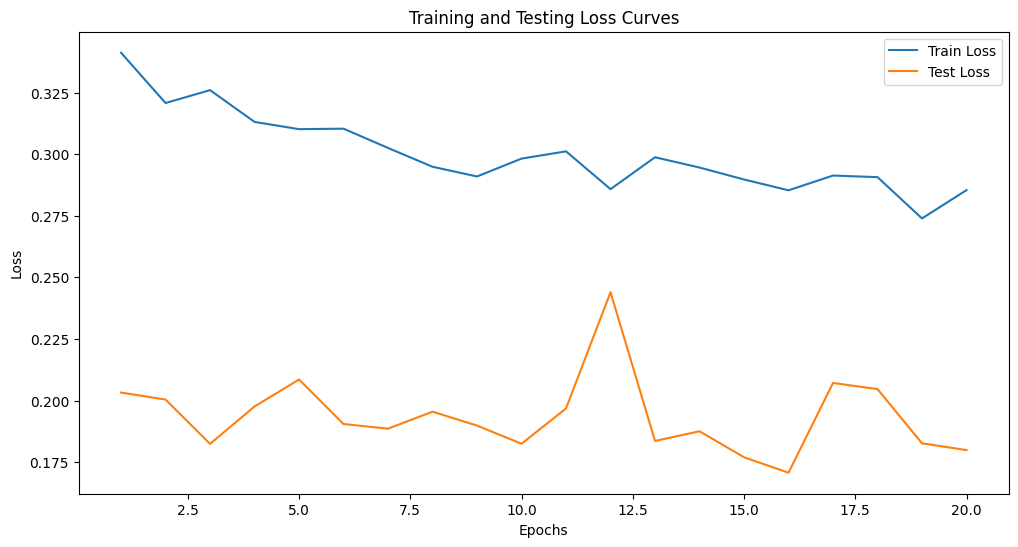

In [49]:
writer = SummaryWriter()
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
optimizer = optim.AdamW(params=model_8.parameters(), lr=1e-3, weight_decay=1e-1)

loss_fn = nn.CrossEntropyLoss()

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Start the timer
start_time = timer()

# Train model_2
train_losses, test_losses = train2(model=model_8, 
                                  train_dataloader=train_dataloader_augmented3,
                                  validation_dataloader_simple=validation_dataloader_simple3,
                                  test_dataloader=test_dataloader_simple3,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device,
                                  writer=writer,
                                  l1_lambda=0.00001)

writer.flush()
writer.close()
# End the timer and print out how long it took
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()

In [143]:
writer = SummaryWriter()
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize model, optimizer, and loss function
optimizer = optim.AdamW(params=model_7.parameters(), lr=1e-3, weight_decay=1e-4)

loss_fn = nn.CrossEntropyLoss()

# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 80

# Start the timer
start_time = timer()

# Train model_2
train_losses, test_losses = train2(model=model_7, 
                                  train_dataloader=train_dataloader_augmented3,
                                  validation_dataloader_simple=validation_dataloader_simple3,
                                  test_dataloader=test_dataloader_simple3,
                                  optimizer=optimizer,
                                  loss_fn=loss_fn, 
                                  epochs=NUM_EPOCHS,
                                  device=device,
                                  writer=writer,
                                  l1_lambda=0.00001)

writer.flush()
writer.close()
# End the timer and print out how long it took
end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, label='Train Loss')
plt.plot(range(1, NUM_EPOCHS + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.show()

Epoch 1/80, Train Loss: 0.3981, Test Loss: 0.2628
Precision: 0.8979, Recall: 0.8949, F1 Score: 0.8947
Epoch 2/80, Train Loss: 0.3846, Test Loss: 0.2535
Precision: 0.8986, Recall: 0.8986, F1 Score: 0.8986
Epoch 3/80, Train Loss: 0.3843, Test Loss: 0.3234
Precision: 0.8766, Recall: 0.8673, F1 Score: 0.8663
Epoch 4/80, Train Loss: 0.3958, Test Loss: 0.2574
Precision: 0.8991, Recall: 0.8989, F1 Score: 0.8989
Epoch 5/80, Train Loss: 0.3953, Test Loss: 0.2591
Precision: 0.9006, Recall: 0.9005, F1 Score: 0.9005
Epoch 6/80, Train Loss: 0.4052, Test Loss: 0.2650
Precision: 0.8984, Recall: 0.8976, F1 Score: 0.8975
Epoch 7/80, Train Loss: 0.4028, Test Loss: 0.2608
Precision: 0.8967, Recall: 0.8954, F1 Score: 0.8953
Epoch 8/80, Train Loss: 0.3894, Test Loss: 0.2563
Precision: 0.8970, Recall: 0.8968, F1 Score: 0.8967
Epoch 9/80, Train Loss: 0.3921, Test Loss: 0.2863
Precision: 0.8881, Recall: 0.8858, F1 Score: 0.8856
Epoch 10/80, Train Loss: 0.3971, Test Loss: 0.2622
Precision: 0.9002, Recall: 0.90

KeyboardInterrupt: 

In [44]:
save_model(model= model_8, target_dir= "models",model_name="wd1e-1_3block_hiddenunit132_26august.pth")

[INFO] Saving model to: models/wd1e-1_3block_hiddenunit132_26august.pth


In [39]:
import torch
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

def compute_confusion_matrix(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculations
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            
            # Get model predictions
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            # Store predictions and labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    return cm

# Example usage
cm = compute_confusion_matrix(model_7, train_dataloader_augmented3, device)

# Plotting the confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'model_7' is not defined

Predicted class index: cat


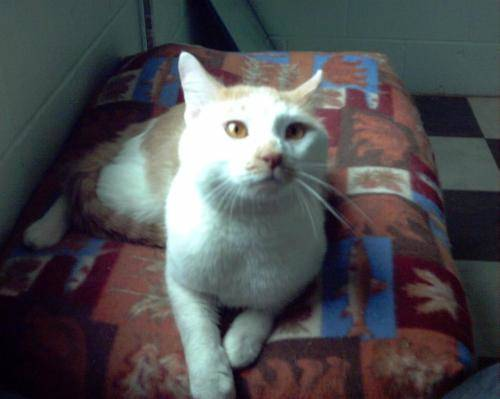

In [199]:
image_path = 'dogs-vs-cats/test1/1291.jpg'

img = Image.open(image_path)



predicted_class, image = predict_image(model_7, image_path, device)

print(f'Predicted class index: {classes[predicted_class]}')

img

In [31]:
save_model(model=model_7, target_dir= "models", model_name="3block_lrdecay_124hdlayer_l1andl2.pth")

[INFO] Saving model to: models/3block_lrdecay_124hdlayer_l1andl2.pth


In [34]:
# Assuming you have your test data loader set up
# e.g., test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def calculate_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients during evaluation
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)  # Move data to the appropriate device
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # Count correct predictions

    accuracy = correct / total * 100  # Convert to percentage
    return accuracy

# Example usage:
test_accuracy = calculate_accuracy(model_7, validation_dataloader_simple3, device)
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 90.57%
